In [19]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 58.5 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 1.3.4 requires numpy<1.20,>=1.16, but you have numpy 1.24.4 which is incompatible.
tfx-bsl 1.3.0 requires numpy<1.20,>=1.16, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.6.1 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
tensorflow-transform 1.3.0 requires numpy<1.20,>=1.16, but you have numpy 1.24.4 which is incompatible.
tensorflow-model-analysis 0.34.1 requires numpy<1.20,>=1.16, but you have nump

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/opt/anaconda3/envs/ds420/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
diabetes = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

In [3]:
diabetes.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Above we have the first five entries in this data frame. It is evident that two columns have values that are 'objects' meaning there are at least two categorical variables. The values of age, bmi, HbA1c_level, and blood_glucose_level are all numeric and quantitative variables. It seems as though there are  hot coded 0 and 1 for variables hypertension, heart_disease, and diabetes. We can do value_count on these variables to make sure there are no other values in these series. 

In [4]:
print(diabetes['hypertension'].value_counts())
print(diabetes['heart_disease'].value_counts())
print(diabetes['diabetes'].value_counts())

0    92515
1     7485
Name: hypertension, dtype: int64
0    96058
1     3942
Name: heart_disease, dtype: int64
0    91500
1     8500
Name: diabetes, dtype: int64


The three variables, hypertension, heart_disease, and diabetes are all binary yes/no responses

In [5]:
#2.
diabetes.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


There are a total of 9 columns in this dataset

The label variable is 'diabetes' which is categorical determining if the patient has been diagnosed with diabetes (1) or does not have diabetes (0)

The predictor variables are as follows:

Gender: categorical: “Female”, “Male”, “Other”   => convert to one-hot vector
Age: quantitative- how old the patient is (range 0 to 80)
Hypertension: categorical- (0) patient does not have hypertension (1) patient has hypertension
Heart_disease: categorical- (0) patient does not have heart disease (1) patient has heart disease
Smoking_history: categorical - “no info”, “never”, “other”   => convert to one hot vector
Bmi: quantitative- body mass index (measure of body fat based on weight and height
HbA1c_level: quantitative- average blood sugar level over the past 2-3 months
Blood_glucose_level: quantitative- amount of glucose in the bloodstream at a given time


In [6]:
#3 Summary Statistics

diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
#5 Correlation Coefficients

corr_matrix = diabetes.corr()
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

Above are statistics summarizing the quantitative variables as well as the originally hot-encoded variables. The range of age is from 0.08 80 years with a mean of 41. The range for bmi is from 10.01 to 95.69 with a mean of 27.32. The range for HbA1c_level is from 3.5% to 9% with an average of 5.52%. The range of blood glucose level is from 80 to 300 mg/dL with an average of 138 mg/dL. We can see by the counts of each variable that there are no missing values

Based on the correlation coefficients, it is evident that blood_glucose_level and HbA1c_level are most associated with the target, diabetes

In [9]:
#6  
def get_value_counts(dataframe,col_list):
    for col in col_list:
        print(dataframe[col].value_counts())
        print('\n')
get_value_counts(diabetes,
                 ['gender','hypertension','heart_disease','smoking_history','diabetes'])

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64


0    92515
1     7485
Name: hypertension, dtype: int64


0    96058
1     3942
Name: heart_disease, dtype: int64


No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


0    91500
1     8500
Name: diabetes, dtype: int64




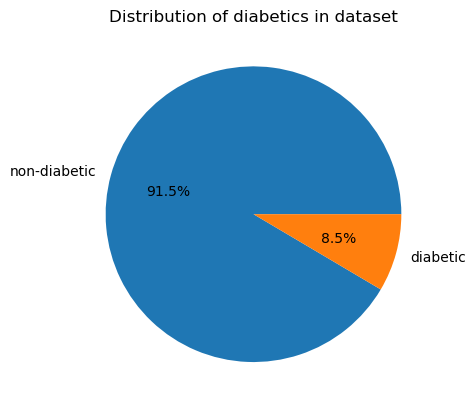

In [ ]:
#7
plt.pie(diabetes['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

As we can see in the above piechart diagram, the non-diabetic distribution is high (91.5%) compared to diabetic which is just 8.5%. 


/tmp/ipykernel_3888810/2618703926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes,


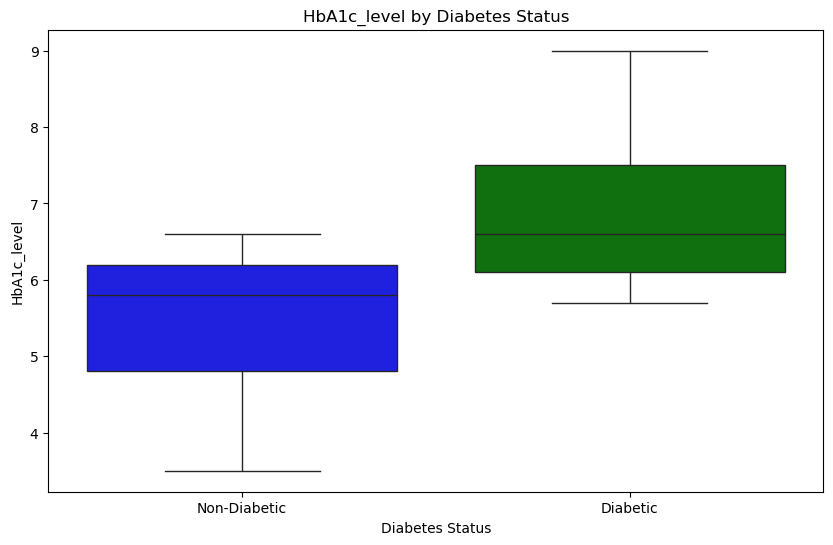

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=diabetes,
            palette=['blue', 'green'])
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

The image depicts a boxplot that compares HbA1c levels between two groups: Non-Diabetic and Diabetic. In the boxplot, the Non-Diabetic group, colored in blue, appears to have lower HbA1c levels overall compared to the Diabetic group, colored in green. This is expected as higher HbA1c levels are a marker of diabetes. The median of the Non-Diabetic group is within the non-diabetic range, below approx 5.7%. The range of HbA1c levels is also narrower for the Non-Diabetic group, suggesting less variability in blood sugar control among individuals without diabetes.Conversely, the green box representing Diabetics has a higher median HbA1c level, likely above the 6.5% threshold that typically indicates diabetes. This group also shows a wider interquartile range, which reflects greater variability in HbA1c levels among individuals with diabetes. 


/tmp/ipykernel_3888810/601250620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes,palette=['blue', 'pink'])


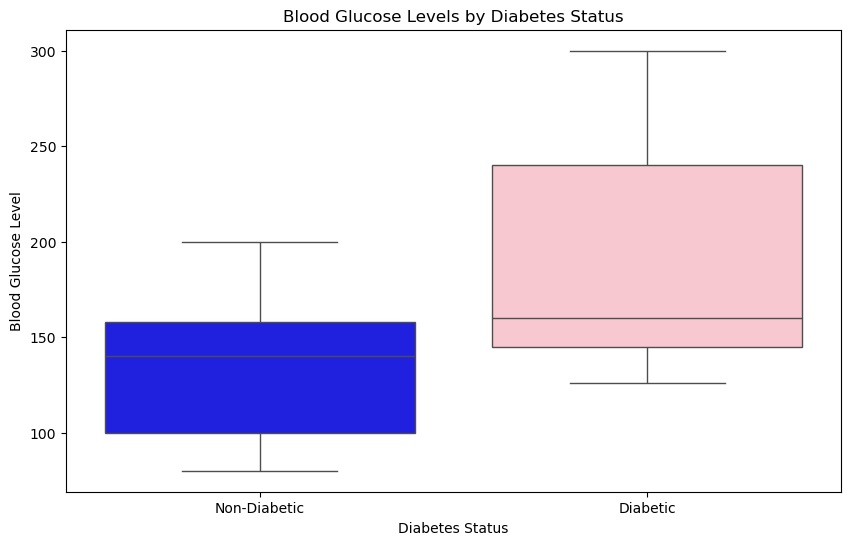

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=diabetes,palette=['blue', 'pink'])
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])  
plt.show()

The boxplot displays blood glucose levels with a clear distinction between Non-Diabetic (blue) and Diabetic (pink) groups. Non-Diabetics have lower, more concentrated glucose levels, while Diabetics show a broader range and higher median levels, indicative of the variation and elevation in blood glucose associated with diabetes. No outliers are present, suggesting a relatively consistent data range within each group.